In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#extract
#Parameters:
#   folder_name: Outermost folder where experiments livem specified in train.py
#   exp_name: Name of the experiment, specified in train.py
#   size: # of workers
#   epochs: # of epochs
#Output:
#   A dictionary containing a complete list of results. 
def extract(folder_name,exp_name,size,epochs):
    
    def train_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/dsgd-r'+rank+'-acc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["train-acc"].append(float(line))
                line = reader.readline()
    def comm_time(subfolder,worker_dic,rank):
        with open(subfolder+'/dsgd-r'+rank+'-commtime.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comm-time"].append(float(line))
                line = reader.readline()
    def comp_time(subfolder,worker_dic,rank):
        with open(subfolder+'/dsgd-r'+rank+'-comptime.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comp-time"].append(float(line))
                line = reader.readline()
    def epoch_time(subfolder,worker_dic,rank):
        with open(subfolder+'/dsgd-r'+rank+'-epoch-time.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["comp-time"].append(float(line))
                line = reader.readline()
    def loss(subfolder,worker_dic,rank):
        with open(subfolder+'/dsgd-r'+rank+'-losses.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["loss"].append(float(line))
                line = reader.readline()            
    def test_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/dsgd-r'+rank+'-tacc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["test-acc"].append(float(line))
                line = reader.readline()
    def val_acc(subfolder,worker_dic,rank):
        with open(subfolder+'/dsgd-r'+rank+'-vacc.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["val-acc"].append(float(line))
                line = reader.readline()
    def total_time(subfolder,worker_dic,rank):
        with open(subfolder+'/dsgd-r'+rank+'-total-time.log', 'r') as reader:
            # Read and print the entire file line by line (epoch by epoch)
            rank = int(rank)
            line = reader.readline()
            while line != '':  # The EOF char is an empty string
                worker_dic[rank]["total-time"].append(float(line))
                line = reader.readline()
    output_folder=folder_name+'/run-'+exp_name+'-'+str(epochs)+'epochs'
    worker_results={}
    for rank in range(size):
        worker_results[rank]={}
        worker_results[rank]["train-acc"]=[]
        worker_results[rank]["comm-time"]=[]
        worker_results[rank]["comp-time"]=[]
        worker_results[rank]["epoch-time"]=[]
        worker_results[rank]["loss"]=[]
        worker_results[rank]["test-acc"]=[]
        worker_results[rank]["val-acc"]=[]
        worker_results[rank]["total-time"]=[]
        train_acc(output_folder,worker_results,str(rank))
        comm_time(output_folder,worker_results,str(rank))
        comp_time(output_folder,worker_results,str(rank))
        epoch_time(output_folder,worker_results,str(rank))
        loss(output_folder,worker_results,str(rank))
        test_acc(output_folder,worker_results,str(rank))
        val_acc(output_folder,worker_results,str(rank))
        total_time(output_folder,worker_results,str(rank))
        
    return worker_results

In [13]:
#plot_experiment
#Parameters:
#   worker_dic: output from extract()
#   size: number of workers
#   epochs: # of epochs
#   key: type of data desired. Ex: "train-acc", "comm-time", etc.
#Output:
#.  A plot of the experiment for given key. 
def plot_experiment(worker_dic, size, epochs, key):
    x=range(epochs)
    for i in range(size):
        worker_data=worker_dic[i][key]
        plt.plot(x,worker_data)
    plt.show()

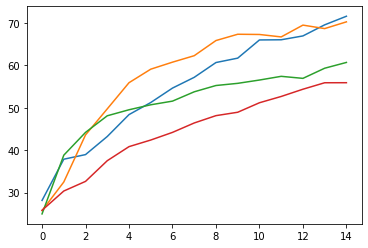

In [15]:
#Example graphing test accuracies by epoch. 

#Generate worker dictionary. 
worker_results=extract('OutputPersonalized','square-pers',4,15)
#Now plot.
plot_experiment(worker_results,4,15,'test-acc')